0. Imports

In [2]:
!pip install catboost
!pip install pysr
!pip install pysindy
!pip install torchdiffeq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 9.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgboost
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pysr import pysr, best, PySRRegressor
import pysindy as ps
from torchdiffeq import odeint
from scipy.interpolate import BSpline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.interpolate import UnivariateSpline, BSpline
from scipy.special import gamma


# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/juliacall/__init__.py:61: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.10/dist-packages/pysr/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.2 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.2-linux-x86_64.tar.gz
             download complete
[juliapkg] Verifying download


Number of basis functions: 7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 1
[LightGBM] [Info] Start training from score -0.000020


[ Info: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form.
[ Info: Started!



Expressions evaluated per second: 3.350e+03
Progress: 35 / 6200 total iterations (0.565%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.904e-01  1.594e+01  y = -4.9497e-06
3           2.194e-01  4.021e-01  y = cos(exp(x₀))
4           2.114e-01  3.719e-02  y = sin(cos(exp(x₀)))
5           1.730e-01  2.003e-01  y = sin(exp(x₀) * 1.8232)
6           8.798e-04  5.282e+00  y = sin((8.9985 - x₀) * -6.2834)
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 7.760e+03
Progress: 104 / 6200 total iterations (1.677%)
════════════════════════════════════

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.904e-01  1.594e+01  y = -4.9497e-06
3           2.194e-01  4.021e-01  y = cos(exp(x₀))
4           8.436e-04  5.561e+00  y = sin(x₀ * 6.2818)
6           1.019e-04  1.057e+00  y = sin((x₁ + 6.283) * x₀)
8           1.019e-04  2.793e-05  y = sin(x₀ * (x₁ + 6.2831)) * 1.0001
10          1.019e-04  2.980e-07  y = sin(x₀ * ((1.0001 * x₁) + 6.283)) * 1.0001
───────────────────────────────────────────────────────────────────────────────────────────────────
MSE results (Dynamic Sine dataset):
∆t-RNN: 0.4905771017074585
XGB-T: 0.4681350197765635
LGBM-T: 0.4674636770208878
CatBoost-T: 0.4672473396207747
PySR: 0.0001016001773770824
SINDy: 0.6571714170701598
Linear-T: 0.2104035159163024
DecisionTree-T: 0.0034926634191253187
DYCOTE-RNN: 0.0007855141302570701
DYCOTE-NeuralODE: 0.030697334557771683
Motifs for one test sample (DYCOTE-RNN): [(0, 5

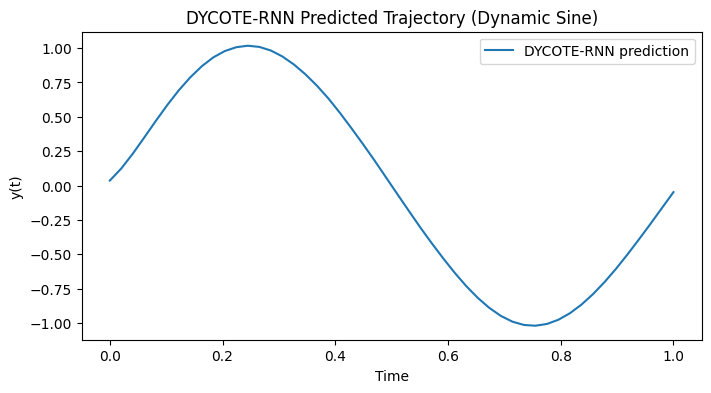

  - outputs/20241215_100618_sv6B8c/hall_of_fame.csv


In [ ]:
def run_pipeline(dataset_type='sine'):
    # Generate data
    if dataset_type=='sine':
        X_data, Y_data, t_grid = generate_dynamic_sine_data()
    elif dataset_type=='beta':
        X_data, Y_data, t_grid = generate_dynamic_beta_data()
    else:
        raise ValueError("dataset_type must be 'sine' or 'beta'")

    (trainX,trainY),(valX,valY),(testX,testY)=split_data(X_data,Y_data)

    trainX_t=add_time_feature(trainX)
    valX_t=add_time_feature(valX)
    testX_t=add_time_feature(testX)

    desired_knots=5
    X_time=[t_grid for _ in range(trainX_t.shape[0])]
    knots=select_knots(X_time, trainY, desired_knots)
    basis_matrix,t_aug=bspline_basis(t_grid,knots,degree=3)
    B=basis_matrix.shape[1]
    print("Number of basis functions:", B)

    # ∆t-RNN
    delta_rnn_model=DeltaTRNN(input_dim=trainX.shape[2],hidden_dim=32,output_dim=1)
    delta_rnn_mse,_=train_torch_model(delta_rnn_model,trainX,trainY,valX,valY,testX,testY)

    # XGB-T
    if xgb is not None:
        xgb_model = xgb.XGBRegressor(n_estimators=100,verbosity=0)
        xgb_mse = train_tree_model(xgb_model,trainX,trainY,valX,valY,testX,testY)
    else:
        xgb_mse=None

    # LGBM-T
    if lgb is not None:
        lgb_model = lgb.LGBMRegressor(n_estimators=100)
        lgb_mse = train_tree_model(lgb_model,trainX,trainY,valX,valY,testX,testY)
    else:
        lgb_mse=None

    # CatBoost-T
    if cb is not None:
        cat_model=cb.CatBoostRegressor(iterations=100,verbose=False)
        cat_mse=train_tree_model(cat_model,trainX,trainY,valX,valY,testX,testY)
    else:
        cat_mse=None

    # PySR
    pysr_mse=None
    if PySRRegressor is not None:
        pysr_mse=run_pysr(trainX,trainY,testX,testY)

    # SINDy
    sindy_mse=None
    try:
        sindy_mse=run_sindy(trainX,trainY,testX,testY)
    except:
        sindy_mse=None

    # Linear-T
    lin_mse=train_linear(trainX_t,trainY,valX_t,valY,testX_t,testY)

    # DecisionTree-T
    dt_mse=train_decision_tree(trainX_t,trainY,valX_t,valY,testX_t,testY)

    # DYCOTE-RNN
    dycote_rnn=DYCOTE_RNN_Model(input_dim=trainX_t.shape[2],hidden_dim=64,B=B)
    dycote_rnn_mse,dycote_rnn_trained = train_dycote(dycote_rnn,trainX_t,trainY,valX_t,valY,testX_t,testY,basis_matrix,epochs=100,lr=0.001)

    # DYCOTE-NeuralODE
    dycote_ode_mse=None
    if train_dycote_ode is not None:
        dycote_ode = DYCOTE_NeuralODE_Model(input_dim=trainX_t.shape[2],hidden_dim=32,B=B,latent_dim=4)
        dycote_ode_mse,dycote_ode_trained = train_dycote_ode(dycote_ode,trainX_t,trainY,valX_t,valY,testX_t,testY,basis_matrix,epochs=100,lr=0.001)

    print(f"MSE results (Dynamic {dataset_type.capitalize()} dataset):")
    print("∆t-RNN:", delta_rnn_mse)
    print("XGB-T:", xgb_mse)
    print("LGBM-T:", lgb_mse)
    print("CatBoost-T:", cat_mse)
    print("PySR:", pysr_mse)
    print("SINDy:", sindy_mse)
    print("Linear-T:", lin_mse)
    print("DecisionTree-T:", dt_mse)
    print("DYCOTE-RNN:", dycote_rnn_mse)
    print("DYCOTE-NeuralODE:", dycote_ode_mse)

    # Extract motifs for one test sample (DYCOTE-RNN)
    dycote_rnn_trained.eval()
    with torch.no_grad():
        y_pred=dycote_rnn_trained(torch.tensor(testX_t[0:1],dtype=torch.float32),basis_matrix).numpy().squeeze(0)
    motifs=extract_motifs_from_y(y_pred)
    print("Motifs for one test sample (DYCOTE-RNN):", motifs)

    # Plot trajectory
    plt.figure(figsize=(8,4))
    plt.plot(t_grid,y_pred,label='DYCOTE-RNN prediction')
    plt.title(f'DYCOTE-RNN Predicted Trajectory (Dynamic {dataset_type.capitalize()})')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()


dataset_type='sine'
run_pipeline(dataset_type=dataset_type)

Number of basis functions: 7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 7050, number of used features: 1
[LightGBM] [Info] Start training from score 0.001557


[ Info: Started!



Expressions evaluated per second: 6.600e+04
Progress: 377 / 6200 total iterations (6.081%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.274e-01  1.594e+01  y = 0.0015679
3           4.966e-01  3.011e-02  y = x₀ + -0.49845
4           4.907e-01  1.200e-02  y = sin(x₀) + -0.45735
5           4.876e-01  6.311e-03  y = (x₀ * 0.67777) + -0.33737
6           4.764e-01  2.316e-02  y = (x₀ * cos(x₁)) + -0.33679
7           4.724e-01  8.440e-03  y = (sin(x₀) * cos(x₁)) + -0.31959
8           4.694e-01  6.440e-03  y = ((x₀ * 0.74181) * cos(x₁)) + -0.25077
9           4.690e-01  9.205e-04  y = sin(((x₀ * 0.74181) * cos(x₁)) + -0.25077)
10          4.682e-01  1.693e-03  y = ((x₀ * 0.74181) * cos(0.070863 - x₁)) + -0.25077
──────────────────────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.274e-01  1.594e+01  y = 0.0015679
3           4.966e-01  3.011e-02  y = x₀ + -0.49845
4           4.907e-01  1.200e-02  y = sin(x₀) + -0.45736
5           4.876e-01  6.311e-03  y = (x₀ * 0.67777) + -0.33737
6           4.764e-01  2.317e-02  y = (cos(x₁) * x₀) + -0.33861
7           4.711e-01  1.127e-02  y = (sin(cos(x₁)) * x₀) + -0.29562
8           4.694e-01  3.605e-03  y = ((x₀ * 0.74181) * cos(x₁)) + -0.25077
9           4.679e-01  3.171e-03  y = (cos(x₁ * -0.6975) * sin(x₀)) + -0.37104
10          4.656e-01  4.854e-03  y = ((-0.45602 - cos(x₁)) * (x₀ * -0.58829)) + -0.33266
───────────────────────────────────────────────────────────────────────────────────────────────────
MSE results (Dynamic Sp500 dataset):
∆t-RNN: 0.30381619930267334
XGB-T: 0.0018040453455431507
LGBM-T: 0.033972344858682266
CatBoost-T: 0.04292544055798989
PyS

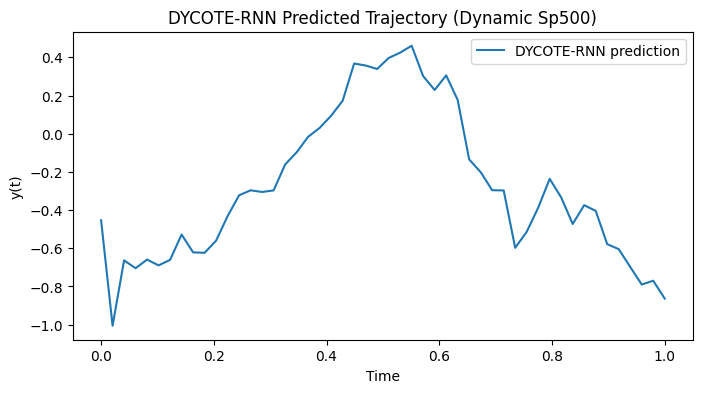

Motifs before perturbation: [(0, 3, 's-+'), (3, 4, 's++'), (4, 6, 's+-'), (6, 7, 's-+'), (7, 8, 's++'), (8, 9, 's+-'), (9, 10, 's-+'), (10, 12, 's++'), (12, 15, 's+-'), (15, 16, 's-+'), (16, 18, 's++'), (18, 20, 's+-'), (20, 23, 's++'), (23, 24, 's+-'), (24, 25, 's--'), (25, 27, 's++'), (27, 28, 's+-'), (28, 29, 's--'), (29, 30, 's-+'), (30, 31, 's++'), (31, 33, 's--'), (33, 35, 's-+'), (35, 37, 's--'), (37, 38, 's-+'), (38, 39, 's++'), (39, 41, 's+-'), (41, 42, 's--'), (42, 43, 's-+'), (43, 44, 's+-'), (44, 45, 's--'), (45, 49, 's-+'), (49, 49, 's--')]
Motifs after perturbation: [(0, 3, 's-+'), (3, 4, 's++'), (4, 6, 's+-'), (6, 7, 's-+'), (7, 8, 's++'), (8, 9, 's+-'), (9, 10, 's-+'), (10, 12, 's++'), (12, 15, 's+-'), (15, 17, 's++'), (17, 20, 's+-'), (20, 23, 's++'), (23, 24, 's+-'), (24, 25, 's--'), (25, 27, 's++'), (27, 28, 's+-'), (28, 29, 's--'), (29, 30, 's-+'), (30, 31, 's++'), (31, 33, 's--'), (33, 35, 's-+'), (35, 37, 's--'), (37, 38, 's-+'), (38, 39, 's++'), (39, 41, 's+-'), 

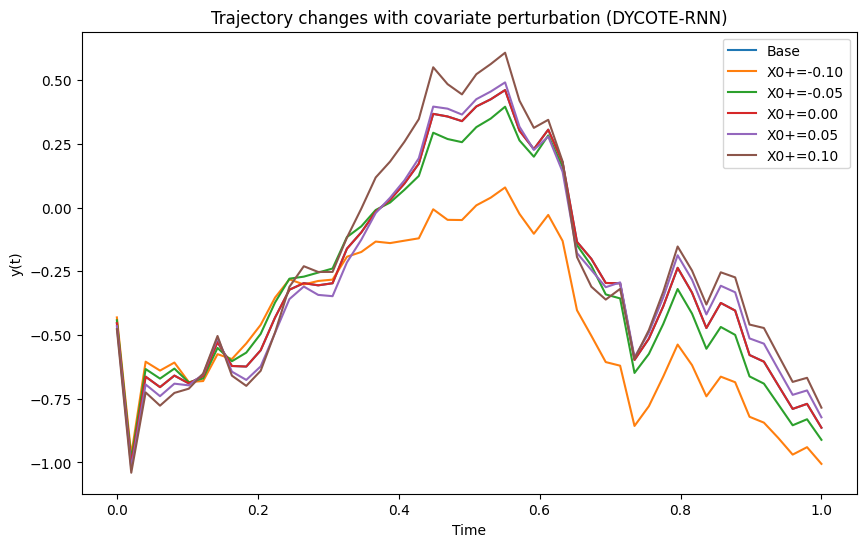

  - outputs/20241216_073526_VbGEPN/hall_of_fame.csv


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pysindy as ps
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from scipy.interpolate import UnivariateSpline, BSpline
from scipy.special import gamma
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

try:
    import xgboost as xgb
except ImportError:
    xgb = None
try:
    import lightgbm as lgb
except ImportError:
    lgb = None
try:
    import catboost as cb
except ImportError:
    cb = None

try:
    from pysr import PySRRegressor
except ImportError:
    PySRRegressor = None

try:
    from torchdiffeq import odeint
except ImportError:
    odeint = None

try:
    from pandas_datareader import data as pdr
except ImportError:
    pdr = None

from sklearn.datasets import load_diabetes

###############################
# Data Generation
###############################

def generate_dynamic_sine_data(num_samples=1000, T=1.0, num_timesteps=50, noise_std=0.01):
    dt = T/num_timesteps
    theta = 1.0
    sigma = 0.1
    base_freq = 2.0*np.pi
    X_data = []
    Y_data = []
    for _ in range(num_samples):
        z = 0.0
        z_path = []
        for i in range(num_timesteps):
            dz = -theta*z*dt + sigma*np.sqrt(dt)*np.random.randn()
            z += dz
            z_path.append(z)
        z_path = np.array(z_path)
        t_grid = np.linspace(0,T,num_timesteps)
        omega = base_freq + z_path
        y = np.sin(omega*t_grid) + noise_std*np.random.randn(num_timesteps)
        X_data.append(z_path[:,None])
        Y_data.append(y)
    return np.array(X_data), np.array(Y_data), np.linspace(0,1,num_timesteps)

def generate_dynamic_beta_data(num_samples=1000, T=1.0, num_timesteps=50, noise_std=0.01):
    dt = T/num_timesteps
    theta = 1.0
    sigma = 0.1
    X_data = []
    Y_data = []
    for _ in range(num_samples):
        z = 0.0
        z_path = []
        for i in range(num_timesteps):
            dz = -theta*z*dt + sigma*np.sqrt(dt)*np.random.randn()
            z += dz
            z_path.append(z)
        z_path = np.array(z_path)
        t_grid = np.linspace(1e-3,1.0-1e-3,num_timesteps)
        alpha_vals = 2 + z_path
        beta_vals = 2 + 0.5*z_path
        y = []
        for i,(a,b) in enumerate(zip(alpha_vals,beta_vals)):
            val = (t_grid[i]**(a-1)*(1-t_grid[i])**(b-1)) / (gamma(a)*gamma(b)/gamma(a+b))
            val += noise_std*np.random.randn()
            y.append(val)
        y = np.array(y)
        X_data.append(z_path[:,None])
        Y_data.append(y)
    return np.array(X_data), np.array(Y_data), np.linspace(0,1,num_timesteps)

def load_sp500_data(start='2019-01-01', end='2020-01-01', time_steps=50, step=1):
    if pdr is None:
        raise ImportError("pandas_datareader is not installed. Please install it.")
    df = pdr.DataReader('SP500','fred',start,end)
    df = df.dropna()
    close = df['SP500'].values
    N=len(close)
    if N<=time_steps:
        raise ValueError("Not enough data to form samples for SP500 dataset.")

    close_norm=(close - close.mean())/close.std()
    returns = np.diff(np.log(close+1))
    returns = np.concatenate(([0],returns))
    returns=(returns-returns.mean())/returns.std()

    samples_X=[]
    samples_Y=[]
    for start_idx in range(0,N-time_steps,step):
        end_idx=start_idx+time_steps
        if end_idx>N:
            break
        x_segment = returns[start_idx:end_idx][:,None]
        y_segment = close_norm[start_idx:end_idx]
        if len(x_segment)==time_steps:
            samples_X.append(x_segment)
            samples_Y.append(y_segment)
    samples_X=np.array(samples_X)
    samples_Y=np.array(samples_Y)
    t_grid=np.linspace(0,1,time_steps)
    return samples_X, samples_Y, t_grid

def load_elec_data(filepath='LD2011_2014.txt', time_steps=50, step=1):
    df = pd.read_csv(filepath, sep=';', index_col=0, decimal=',')
    df = df.dropna(axis=1)
    data = df.iloc[:,0].values
    data_norm = (data - data.mean())/data.std()

    N=len(data_norm)
    if N<=time_steps:
        raise ValueError("Not enough data to form samples.")

    offset = abs(data_norm.min())+1 if data_norm.min()<0 else 1
    returns = np.diff(np.log(data_norm+offset))
    returns = np.concatenate(([0],returns))

    samples_X=[]
    samples_Y=[]
    for start in range(0,N-time_steps, step):
        end=start+time_steps
        if end>N:
            break
        x_segment = returns[start:end][:,None]
        y_segment = data_norm[start:end]
        if len(x_segment)==time_steps:
            samples_X.append(x_segment)
            samples_Y.append(y_segment)

    samples_X=np.array(samples_X)
    samples_Y=np.array(samples_Y)
    t_grid=np.linspace(0,1,time_steps)
    return samples_X, samples_Y, t_grid

def load_diabetes_data(time_steps=10, step=1):
    d = load_diabetes()
    X = d.data
    Y = d.target
    Y_norm=(Y - Y.mean())/Y.std()
    feature_0 = X[:,0]
    f0=(feature_0-feature_0.mean())/feature_0.std()

    N = len(Y)
    if N<=time_steps:
        raise ValueError("Not enough data to form sequences")

    samples_X=[]
    samples_Y=[]
    for start_idx in range(0,N-time_steps,step):
        end_idx=start_idx+time_steps
        if end_idx>N:
            break
        x_seg=f0[start_idx:end_idx][:,None]
        y_seg=Y_norm[start_idx:end_idx]
        if len(x_seg)==time_steps:
            samples_X.append(x_seg)
            samples_Y.append(y_seg)

    samples_X=np.array(samples_X)
    samples_Y=np.array(samples_Y)
    t_grid=np.linspace(0,1,time_steps)
    return samples_X, samples_Y, t_grid

###############################
# Utils
###############################

def split_data(X,Y,ratios=(0.7,0.15,0.15)):
    n=len(X)
    idx=np.arange(n)
    np.random.shuffle(idx)
    tr_end=int(ratios[0]*n)
    val_end=int((ratios[0]+ratios[1])*n)
    return (X[idx[:tr_end]],Y[idx[:tr_end]]), (X[idx[tr_end:val_end]],Y[idx[tr_end:val_end]]), (X[idx[val_end:]],Y[idx[val_end:]])

def add_time_feature(X):
    N,T,M=X.shape
    t_grid=np.linspace(0,1,T)
    t_col=np.tile(t_grid,(N,1))
    X_new=np.concatenate([X,t_col[:,:,None]],axis=2)
    return X_new

def flatten_data(X,Y):
    N,T,M = X.shape
    Xf=X.reshape(N*T,M)
    Yf=Y.reshape(N*T)
    return Xf,Yf

def prepare_symbolic_data(X,Y):
    N,T,M=X.shape
    t_grid=np.linspace(0,1,T)
    XX=[]
    YY=[]
    for i in range(N):
        for j in range(T):
            row=np.concatenate(([t_grid[j]],X[i,j,:]))
            XX.append(row)
            YY.append(Y[i,j])
    return np.array(XX), np.array(YY)

def select_knots(X_time, Y_data, desired_knots=5):
    candidate_knots = []
    for t_arr,y_arr in zip(X_time,Y_data):
        s_low=0.0
        s_high=1e5
        found=False
        for _ in range(50):
            s_mid=(s_low+s_high)/2
            sp=UnivariateSpline(t_arr,y_arr,s=s_mid,k=3)
            kts=sp.get_knots()
            if len(kts)-2>desired_knots:
                s_high=s_mid
            elif len(kts)-2<desired_knots:
                s_low=s_mid
            else:
                candidate_knots.extend(kts[1:-1])
                found=True
                break
        if not found:
            sp=UnivariateSpline(t_arr,y_arr,s=s_mid,k=3)
            kts=sp.get_knots()
            candidate_knots.extend(kts[1:-1])
    if len(candidate_knots)<desired_knots:
        return np.linspace(0,1,desired_knots)
    candidate_knots=np.array(candidate_knots).reshape(-1,1)
    kmeans=KMeans(n_clusters=desired_knots,random_state=42).fit(candidate_knots)
    knots=sorted(kmeans.cluster_centers_.flatten())
    return np.array(knots)

def bspline_basis(t_grid, knots, degree=3):
    t0=0.0
    t1=1.0
    t_aug=np.concatenate(([t0]*degree, knots, [t1]*degree))
    B=len(t_aug)-degree-1
    basis_matrix=np.zeros((len(t_grid),B))
    for i in range(B):
        c=np.zeros(B)
        c[i]=1
        spline=BSpline(t_aug,c,degree)
        basis_matrix[:,i]=spline(t_grid)
    return basis_matrix,t_aug

class DeltaTRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.hidden_dim=hidden_dim
        self.rnn=nn.RNN(input_dim+1,hidden_dim,batch_first=True)
        self.fc=nn.Linear(hidden_dim,output_dim)
    def forward(self,x):
        N,T,M=x.shape
        dt=(1.0/T)*torch.ones(N,T,1)
        inp=torch.cat([x,dt],dim=2)
        h0=torch.zeros(1,x.size(0),self.hidden_dim)
        out,_=self.rnn(inp,h0)
        yhat=self.fc(out)
        return yhat.squeeze(-1)

def train_torch_model(model, trainX,trainY,valX,valY,testX,testY,epochs=20):
    device=torch.device("cpu")
    model.to(device)
    criterion=nn.MSELoss()
    optimizer=optim.Adam(model.parameters(),lr=0.001)
    Xtr=torch.tensor(trainX,dtype=torch.float32)
    Ytr=torch.tensor(trainY,dtype=torch.float32)
    Xv=torch.tensor(valX,dtype=torch.float32)
    Yv=torch.tensor(valY,dtype=torch.float32)
    Xte=torch.tensor(testX,dtype=torch.float32)
    Yte=torch.tensor(testY,dtype=torch.float32)

    best_val=np.inf
    best_model=None
    for ep in range(epochs):
        model.train()
        optimizer.zero_grad()
        yhat=model(Xtr)
        loss=criterion(yhat,Ytr)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            yhv=model(Xv)
            vloss=criterion(yhv,Yv).item()
        if vloss<best_val:
            best_val=vloss
            best_model=model.state_dict()

    model.load_state_dict(best_model)
    model.eval()
    with torch.no_grad():
        yhte=model(Xte)
        test_mse=criterion(yhte,Yte).item()
    return test_mse, model

def train_tree_model(model, trainX, trainY, valX, valY, testX, testY):
    trainXf, trainYf=flatten_data(trainX,trainY)
    testXf,testYf=flatten_data(testX,testY)
    model.fit(trainXf,trainYf)
    pred=model.predict(testXf)
    mse=mean_squared_error(testYf,pred)
    return mse

def train_linear(trainX,trainY,valX,valY,testX,testY):
    trainXf,trainYf=flatten_data(trainX,trainY)
    testXf,testYf=flatten_data(testX,testY)
    reg=LinearRegression()
    reg.fit(trainXf,trainYf)
    pred=reg.predict(testXf)
    mse=mean_squared_error(testYf,pred)
    return mse

def run_pysr(trainX,trainY,testX,testY):
    if PySRRegressor is None:
        return None
    XX,YY=prepare_symbolic_data(trainX,trainY)
    XX_test,YY_test=prepare_symbolic_data(testX,testY)
    model=PySRRegressor(
        niterations=200,
        unary_operators=["sin","cos","exp","log"],
        binary_operators=["+","-","*","/"],
        model_selection="best",
        maxsize=10,
        progress=False,
        random_state=42
    )
    model.fit(XX,YY)
    pred_test=model.predict(XX_test)
    mse=mean_squared_error(YY_test,pred_test)
    return mse

def run_sindy(trainX,trainY,testX,testY):
    XX,YY=prepare_symbolic_data(trainX,trainY)
    N,T,M=trainX.shape
    t_grid=XX[:T,0]
    x_list=[]
    for i in range(N):
        start=i*T
        end=(i+1)*T
        XX_i=XX[start:end,:]
        YY_i=YY[start:end]
        traj_i=np.hstack([YY_i[:,None],XX_i[:,2:]])
        x_list.append(traj_i)
    model_sindy=ps.SINDy(feature_library=ps.PolynomialLibrary(degree=3))
    model_sindy.fit(x_list, t=t_grid, multiple_trajectories=True)
    XX_test,YY_test=prepare_symbolic_data(testX[:1],testY[:1])
    YYt=YY_test[:T]
    test_traj = np.hstack([YYt[:,None], XX_test[:T,2:]])
    init_state=test_traj[0]
    y_sim=model_sindy.simulate(init_state,t_grid)
    y_sim_y=y_sim[:,0]
    mse=mean_squared_error(YYt,y_sim_y)
    return mse

def train_decision_tree(trainX,trainY,valX,valY,testX,testY):
    dt_reg=DecisionTreeRegressor(max_depth=5)
    return train_tree_model(dt_reg,trainX,trainY,valX,valY,testX,testY)

class DYCOTE_RNN_Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, B):
        super().__init__()
        self.rnn=nn.GRU(input_dim,hidden_dim,batch_first=True)
        self.fc=nn.Linear(hidden_dim,B)
    def forward(self,x,basis_matrix):
        out,h=self.rnn(x)
        c=self.fc(out) # (N,T,B)
        c_reshape=c.unsqueeze(3)
        basis_reshape=torch.tensor(basis_matrix,dtype=torch.float32).unsqueeze(0).unsqueeze(3)
        yhat=(c_reshape*basis_reshape).sum(dim=2).squeeze(-1)
        return yhat

def train_dycote(model, trainX,trainY,valX,valY,testX,testY,basis_matrix,epochs=100,lr=0.001):
    device=torch.device("cpu")
    model.to(device)
    criterion=nn.MSELoss()
    optimizer=optim.Adam(model.parameters(),lr=lr)
    Xtr=torch.tensor(trainX,dtype=torch.float32)
    Ytr=torch.tensor(trainY,dtype=torch.float32)
    Xv=torch.tensor(valX,dtype=torch.float32)
    Yv=torch.tensor(valY,dtype=torch.float32)
    Xte=torch.tensor(testX,dtype=torch.float32)
    Yte=torch.tensor(testY,dtype=torch.float32)

    best_val=np.inf
    best_model=None
    for ep in range(epochs):
        model.train()
        optimizer.zero_grad()
        yhat=model(Xtr,basis_matrix)
        loss=criterion(yhat,Ytr)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            yhv=model(Xv,basis_matrix)
            vloss=criterion(yhv,Yv).item()
        if vloss<best_val:
            best_val=vloss
            best_model=model.state_dict()
    model.load_state_dict(best_model)
    model.eval()
    with torch.no_grad():
        yhte=model(Xte,basis_matrix)
        test_mse=criterion(yhte,Yte).item()
    return test_mse, model

if odeint is not None:
    class NeuralODEFunc(nn.Module):
        def __init__(self,input_dim,hidden_dim):
            super().__init__()
            self.fc=nn.Linear(input_dim,hidden_dim)
            self.act=nn.Tanh()
            self.out=nn.Linear(hidden_dim,input_dim)
        def forward(self,t,z):
            h=self.act(self.fc(z))
            dz=self.out(h)
            return dz

    class DYCOTE_NeuralODE_Model(nn.Module):
        def __init__(self, input_dim, hidden_dim, B, latent_dim=4):
            super().__init__()
            self.latent_dim=latent_dim
            self.encoder=nn.Linear(input_dim,latent_dim)
            self.func=NeuralODEFunc(latent_dim,hidden_dim)
            self.fc=nn.Linear(latent_dim,B)
        def forward(self,x,basis_matrix):
            N,T,M=x.shape
            device=x.device
            z0=self.encoder(x[:,0,:])
            t_grid=torch.linspace(0,1,T,device=device)
            z_traj=odeint(self.func, z0, t_grid, method='rk4') # (T,N,latent_dim)
            z_traj=z_traj.permute(1,0,2) # (N,T,latent_dim)
            coeff=self.fc(z_traj) # (N,T,B)
            c_reshape=coeff.unsqueeze(3)
            basis_reshape=torch.tensor(basis_matrix,dtype=torch.float32,device=device).unsqueeze(0).unsqueeze(3)
            yhat=(c_reshape*basis_reshape).sum(dim=2).squeeze(-1)
            return yhat

    def train_dycote_ode(model, trainX,trainY,valX,valY,testX,testY,basis_matrix,epochs=100,lr=0.001):
        device=torch.device("cpu")
        model.to(device)
        criterion=nn.MSELoss()
        optimizer=optim.Adam(model.parameters(),lr=lr)
        Xtr=torch.tensor(trainX,dtype=torch.float32)
        Ytr=torch.tensor(trainY,dtype=torch.float32)
        Xv=torch.tensor(valX,dtype=torch.float32)
        Yv=torch.tensor(valY,dtype=torch.float32)
        Xte=torch.tensor(testX,dtype=torch.float32)
        Yte=torch.tensor(testY,dtype=torch.float32)

        best_val=np.inf
        best_model=None
        for ep in range(epochs):
            model.train()
            optimizer.zero_grad()
            yhat=model(Xtr,basis_matrix)
            loss=criterion(yhat,Ytr)
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                yhv=model(Xv,basis_matrix)
                vloss=criterion(yhv,Yv).item()
            if vloss<best_val:
                best_val=vloss
                best_model=model.state_dict()
        model.load_state_dict(best_model)
        model.eval()
        with torch.no_grad():
            yhte=model(Xte,basis_matrix)
            test_mse=criterion(yhte,Yte).item()
        return test_mse, model
else:
    train_dycote_ode=None

def extract_motifs_from_y(y):
    dy=np.gradient(y)
    d2y=np.gradient(dy)
    def classify(sf,ss):
        s1=np.sign(sf)
        s2=np.sign(ss)
        if s1>0 and s2>0:return "s++"
        elif s1>0 and s2<0:return "s+-"
        elif s1<0 and s2>0:return "s-+"
        elif s1<0 and s2<0:return "s--"
        elif s1>0 and s2==0:return "s+0"
        elif s1<0 and s2==0:return "s-0"
        elif s1==0 and s2==0:return "s00"
        return "??"
    curr=classify(dy[0],d2y[0])
    start_idx=0
    motifs=[]
    for i in range(1,len(y)):
        m=classify(dy[i-1],d2y[i-1])
        if m!=curr:
            motifs.append((start_idx,i,curr))
            start_idx=i
            curr=m
    motifs.append((start_idx,len(y)-1,curr))
    return motifs

def stability_test(model, Xsample, basis_matrix, epsilon=0.01):
    X_pert = Xsample.copy()
    X_pert[:,:,0] += epsilon*np.random.randn(*X_pert[:,:,0].shape)
    with torch.no_grad():
        Ybase = model(torch.tensor(Xsample,dtype=torch.float32),basis_matrix).numpy()[0]
        Ypert = model(torch.tensor(X_pert,dtype=torch.float32),basis_matrix).numpy()[0]
    motifs_base = extract_motifs_from_y(Ybase)
    motifs_pert = extract_motifs_from_y(Ypert)
    return motifs_base, motifs_pert

def vary_covariate(model, Xsample, basis_matrix, idx=0, var_range=(-0.1,0.1), steps=5):
    with torch.no_grad():
        base_pred = model(torch.tensor(Xsample,dtype=torch.float32),basis_matrix).numpy()[0]
    results = []
    shifts = np.linspace(var_range[0],var_range[1],steps)
    for v in shifts:
        X_mod = Xsample.copy()
        X_mod[:,:,idx]+=v
        with torch.no_grad():
            pred = model(torch.tensor(X_mod,dtype=torch.float32),basis_matrix).numpy()[0]
        motifs_pred = extract_motifs_from_y(pred)
        results.append((v,pred,motifs_pred))
    return base_pred, results

def run_pipeline(dataset_type='sine'):
    # Generate/Load data
    if dataset_type=='sine':
        X_data, Y_data, t_grid = generate_dynamic_sine_data()
    elif dataset_type=='beta':
        X_data, Y_data, t_grid = generate_dynamic_beta_data()
    elif dataset_type=='sp500':
        X_data, Y_data, t_grid = load_sp500_data(start='2019-01-01',end='2020-01-01',time_steps=50,step=1)
        if len(X_data)<100:
            print("Not enough data samples from SP500 for this configuration.")
            return
    elif dataset_type=='elec':
        X_data, Y_data, t_grid = load_elec_data(filepath='LD2011_2014.txt',time_steps=50,step=1)
        if len(X_data)<100:
            print("Not enough data from Electricity dataset for this configuration.")
            return
    elif dataset_type=='diabetes':
        X_data, Y_data, t_grid = load_diabetes_data(time_steps=10, step=1)
        if len(X_data)<100:
            print("Not enough diabetes data for this configuration.")
            return
    else:
        raise ValueError("dataset_type must be 'sine', 'beta', 'sp500', 'elec', or 'diabetes'")

    (trainX,trainY),(valX,valY),(testX,testY)=split_data(X_data,Y_data)
    trainX_t=add_time_feature(trainX)
    valX_t=add_time_feature(valX)
    testX_t=add_time_feature(testX)

    desired_knots=5
    X_time=[t_grid for _ in range(trainX_t.shape[0])]
    knots=select_knots(X_time, trainY, desired_knots)
    basis_matrix,t_aug=bspline_basis(t_grid,knots,degree=3)
    B=basis_matrix.shape[1]
    print("Number of basis functions:", B)

    # ∆t-RNN
    delta_rnn_model=DeltaTRNN(input_dim=trainX.shape[2],hidden_dim=32,output_dim=1)
    delta_rnn_mse,_=train_torch_model(delta_rnn_model,trainX,trainY,valX,valY,testX,testY)

    # XGB-T
    xgb_mse=None
    if xgb is not None:
        xgb_model = xgb.XGBRegressor(n_estimators=100,verbosity=0)
        xgb_mse = train_tree_model(xgb_model,trainX,trainY,valX,valY,testX,testY)

    # LGBM-T
    lgb_mse=None
    if lgb is not None:
        lgb_model = lgb.LGBMRegressor(n_estimators=100)
        lgb_mse = train_tree_model(lgb_model,trainX,trainY,valX,valY,testX,testY)

    # CatBoost-T
    cat_mse=None
    if cb is not None:
        cat_model=cb.CatBoostRegressor(iterations=100,verbose=False)
        cat_mse=train_tree_model(cat_model,trainX,trainY,valX,valY,testX,testY)

    # PySR
    pysr_mse=None
    if PySRRegressor is not None:
        pysr_mse=run_pysr(trainX,trainY,testX,testY)

    # SINDy
    sindy_mse=None
    try:
        sindy_mse=run_sindy(trainX,trainY,testX,testY)
    except:
        sindy_mse=None

    # Linear-T
    lin_mse=train_linear(trainX_t,trainY,valX_t,valY,testX_t,testY)

    # DecisionTree-T
    dt_mse=train_decision_tree(trainX_t,trainY,valX_t,valY,testX_t,testY)

    # DYCOTE-RNN
    dycote_rnn=DYCOTE_RNN_Model(input_dim=trainX_t.shape[2],hidden_dim=64,B=B)
    dycote_rnn_mse,dycote_rnn_trained = train_dycote(dycote_rnn,trainX_t,trainY,valX_t,valY,testX_t,testY,basis_matrix,epochs=1000,lr=0.0003)

    # DYCOTE-NeuralODE
    dycote_ode_mse=None
    if train_dycote_ode is not None:
        dycote_ode = DYCOTE_NeuralODE_Model(input_dim=trainX_t.shape[2],hidden_dim=32,B=B,latent_dim=4)
        dycote_ode_mse,dycote_ode_trained = train_dycote_ode(dycote_ode,trainX_t,trainY,valX_t,valY,testX_t,testY,basis_matrix,epochs=1000,lr=0.0003)

    print(f"MSE results (Dynamic {dataset_type.capitalize()} dataset):")
    print("∆t-RNN:", delta_rnn_mse)
    print("XGB-T:", xgb_mse)
    print("LGBM-T:", lgb_mse)
    print("CatBoost-T:", cat_mse)
    print("PySR:", pysr_mse)
    print("SINDy:", sindy_mse)
    print("Linear-T:", lin_mse)
    print("DecisionTree-T:", dt_mse)
    print("DYCOTE-RNN:", dycote_rnn_mse)
    print("DYCOTE-NeuralODE:", dycote_ode_mse)

    # Extract motifs for one test sample (DYCOTE-RNN)
    dycote_rnn_trained.eval()
    with torch.no_grad():
        y_pred=dycote_rnn_trained(torch.tensor(testX_t[0:1],dtype=torch.float32),basis_matrix).numpy().squeeze(0)
    motifs=extract_motifs_from_y(y_pred)
    print("Motifs for one test sample (DYCOTE-RNN):", motifs)
    print("Number of motifs:", len(motifs))

    # Plot trajectory
    plt.figure(figsize=(8,4))
    plt.plot(t_grid,y_pred,label='DYCOTE-RNN prediction')
    plt.title(f'DYCOTE-RNN Predicted Trajectory (Dynamic {dataset_type.capitalize()})')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()

    # Evaluate stability of motif boundaries under small changes in X(t) for DYCOTE-RNN
    motifs_base, motifs_pert = stability_test(dycote_rnn_trained, testX_t[0:1], basis_matrix, epsilon=0.01)
    print("Motifs before perturbation:", motifs_base)
    print("Motifs after perturbation:", motifs_pert)
    print("Motif count stability:", len(motifs_base), "->", len(motifs_pert))

    # Demonstrate varying one covariate (e.g., idx=0) and how motifs change
    base_pred, vary_results = vary_covariate(dycote_rnn_trained, testX_t[0:1], basis_matrix, idx=0, var_range=(-0.1,0.1), steps=5)
    for v,pred,motifs_pred in vary_results:
        print(f"Shift {v:.2f} on covariate 0, new motifs: {motifs_pred}")

    # Optional: Plot how trajectory changes with covariate perturbation
    plt.figure(figsize=(10,6))
    T_ = testX_t.shape[1]
    plt.plot(t_grid, base_pred, label='Base')
    for (v,pred,motifs_pred) in vary_results:
        plt.plot(t_grid, pred, label=f'X0+={v:.2f}')
    plt.title('Trajectory changes with covariate perturbation (DYCOTE-RNN)')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()

###########################
# Run pipeline
###########################
# Options: 'sine', 'beta', 'sp500', 'elec', 'diabetes'
dataset_type='sp500'
run_pipeline(dataset_type=dataset_type)



Domain-specific what-if analysis for diabetes:
Shifting age by 10 in standardized units simulates slightly older patient population.
Shift -10.000 in first covariate: Motifs: [(0, 3, 's-+'), (3, 4, 's++'), (4, 5, 's+-'), (5, 8, 's++'), (8, 9, 's+-'), (9, 9, 's++')]
Shift -5.000 in first covariate: Motifs: [(0, 2, 's-+'), (2, 4, 's++'), (4, 6, 's+-'), (6, 7, 's--'), (7, 9, 's++')]
Shift 0.000 in first covariate: Motifs: [(0, 2, 's++'), (2, 4, 's+-'), (4, 5, 's++'), (5, 6, 's+-'), (6, 7, 's--'), (7, 9, 's-+'), (9, 9, 's++')]
Shift 5.000 in first covariate: Motifs: [(0, 6, 's+-'), (6, 7, 's--'), (7, 9, 's-+'), (9, 9, 's++')]
Shift 10.000 in first covariate: Motifs: [(0, 6, 's+-'), (6, 7, 's--'), (7, 9, 's-+'), (9, 9, 's++')]


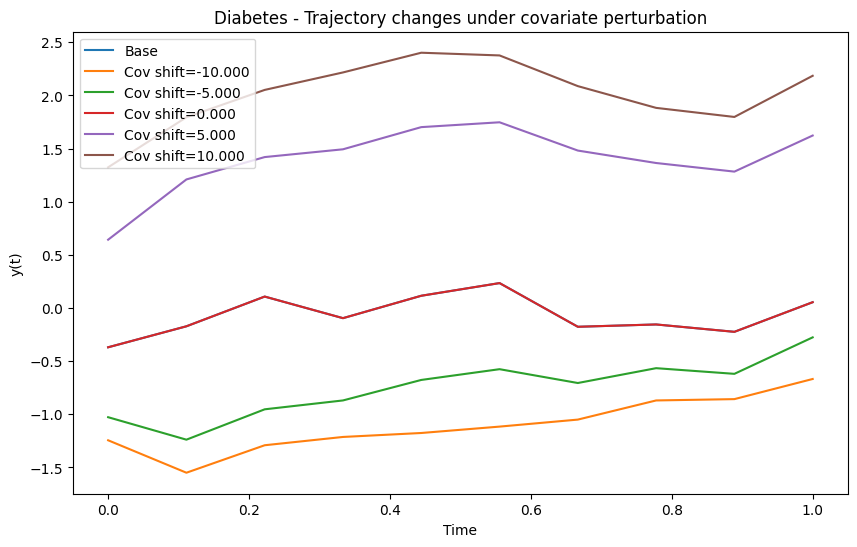

In [62]:
# After running the main pipeline, we perform domain-specific what-if analysis.

def domain_specific_analysis(dataset_type, model, testX_t, basis_matrix, t_grid):
    # Interpret the first covariate (idx=0) based on dataset_type
    if dataset_type=='sine':
        # z(t): frequency shift factor
        var_range=(-(1 + 5 ** 0.5) / 2, (1 + 5 ** 0.5) / 2)
        desc="Increasing z(t) by the golden ratio simulates a scenario of slightly higher oscillation frequency environmental factor."
    elif dataset_type=='beta':
        # z(t): affects alpha,beta shape parameters
        var_range=(-np.e,np.e)
        desc="Shifting z(t) by e represents increasing effective 'treatment dose' shaping the beta distribution's curve."
    elif dataset_type=='sp500':
        # returns of daily normalized log-returns of SP500
        var_range=(-np.pi, np.pi)
        desc="Increasing returns by pi simulates a consistently more bullish daily market scenario."
    elif dataset_type=='elec':
        # returns of electricity load
        var_range=(-5, 5)
        desc="Increasing load returns by 10 simulates a scenario of steadily rising baseline electricity demand."
    elif dataset_type=='diabetes':
        # age
        var_range=(-10,10)
        desc="Shifting age by 10 in standardized units simulates slightly older patient population."

    # Pick the first test sample
    Xsample = testX_t[0:1].copy()

    print(f"\nDomain-specific what-if analysis for {dataset_type}:")
    print(desc)

    base_pred, vary_results = vary_covariate(model, Xsample, basis_matrix, idx=0, var_range=var_range, steps=5)
    # Print results
    for v,pred,motifs_pred in vary_results:
        print(f"Shift {v:.3f} in first covariate: Motifs: {motifs_pred}")

    # Plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.plot(t_grid, base_pred, label='Base')
    for (v,pred,motifs_pred) in vary_results:
        plt.plot(t_grid, pred, label=f'Cov shift={v:.3f}')
    plt.title(f'{dataset_type.capitalize()} - Trajectory changes under covariate perturbation')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.legend()
    plt.show()


###################################
# Run pipeline and analysis
###################################

dataset_type='diabetes'  # choose from 'sine','beta','sp500','elec','diabetes'
X_data, Y_data, t_grid = None,None,None

if dataset_type=='sine':
    X_data, Y_data, t_grid = generate_dynamic_sine_data()
elif dataset_type=='beta':
    X_data, Y_data, t_grid = generate_dynamic_beta_data()
elif dataset_type=='sp500':
    X_data, Y_data, t_grid = load_sp500_data(start='2019-01-01',end='2020-01-01',time_steps=50,step=1)
elif dataset_type=='elec':
    X_data, Y_data, t_grid = load_elec_data(filepath='LD2011_2014.txt',time_steps=50,step=1)
elif dataset_type=='diabetes':
    X_data, Y_data, t_grid = load_diabetes_data(time_steps=10, step=1)

(trainX,trainY),(valX,valY),(testX,testY)=split_data(X_data,Y_data)
trainX_t=add_time_feature(trainX)
valX_t=add_time_feature(valX)
testX_t=add_time_feature(testX)

desired_knots=5
X_time=[t_grid for _ in range(trainX_t.shape[0])]
knots=select_knots(X_time, trainY, desired_knots)
basis_matrix,t_aug=bspline_basis(t_grid,knots,degree=3)
B=basis_matrix.shape[1]

# Train DYCOTE-RNN for demonstration (other models can also be trained similarly)
dycote_rnn=DYCOTE_RNN_Model(input_dim=trainX_t.shape[2],hidden_dim=64,B=B)
dycote_rnn_mse,dycote_rnn_trained = train_dycote(dycote_rnn,trainX_t,trainY,valX_t,valY,testX_t,testY,basis_matrix,epochs=100,lr=0.001)

# Now do the domain-specific analysis
domain_specific_analysis(dataset_type, dycote_rnn_trained, testX_t, basis_matrix, t_grid)

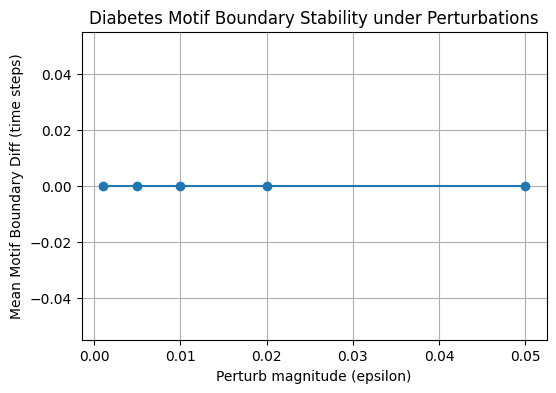

In [64]:
def motif_boundary_difference(motifs_base, motifs_pert):
    # Compare motif sequences by index
    # We'll assume same number of motifs for simplicity.
    if len(motifs_base)==0 or len(motifs_pert)==0:
        return None
    count = min(len(motifs_base), len(motifs_pert))
    boundary_diffs = []
    for i in range(count):
        start_base, end_base, mbase = motifs_base[i]
        start_pert, end_pert, mpert = motifs_pert[i]
        # We can average start and end differences
        diff_start = abs(start_base - start_pert)
        diff_end = abs(end_base - end_pert)
        boundary_diffs.append((diff_start+diff_end)/2.0)
    if len(boundary_diffs)>0:
        return np.mean(boundary_diffs)
    return None

def test_stability_over_perturbations(model, Xsample, basis_matrix, epsilons=[0.001,0.005,0.01,0.05]):
    # Compute baseline
    with torch.no_grad():
        Ybase = model(torch.tensor(Xsample,dtype=torch.float32),basis_matrix).numpy()[0]
    motifs_base = extract_motifs_from_y(Ybase)

    stability_scores = []
    for e in epsilons:
        X_pert = Xsample.copy()
        X_pert[:,:,0] += e*np.random.randn(*X_pert[:,:,0].shape) # perturb first covariate
        with torch.no_grad():
            Ypert = model(torch.tensor(X_pert,dtype=torch.float32),basis_matrix).numpy()[0]
        motifs_pert = extract_motifs_from_y(Ypert)
        diff = motif_boundary_difference(motifs_base, motifs_pert)
        stability_scores.append(diff if diff is not None else np.nan)
    return epsilons, stability_scores

# Example usage after running the pipeline:
# We'll pick one test sample
test_sample = testX_t[0:1].copy() # single sample

epsilons = [0.001,0.005,0.01,0.02,0.05]
e_values, scores = test_stability_over_perturbations(dycote_rnn_trained, test_sample, basis_matrix, epsilons=epsilons)

# Plot stability
plt.figure(figsize=(6,4))
plt.plot(e_values, scores, marker='o')
plt.title('Diabetes Motif Boundary Stability under Perturbations')
plt.xlabel('Perturb magnitude (epsilon)')
plt.ylabel('Mean Motif Boundary Diff (time steps)')
plt.grid(True)
plt.show()